In [1]:
%load_ext autoreload
%autoreload 2

# Bigram Language Model 

In the second part of this lecture series, we will demonstrate how to compute the bigram counts using a neural network in PyTorch and how backpropagation can derive the same maximum likelihood estimates.

Let's start from the problem of learning a function $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ that minimizes the loss between the ground truth labels $y$ and the predicted probabilities $\hat{y}$, where $y, \hat{y} \in \mathbb{R}^n$. E.g.


\begin{align}
\hat{y} &= f\begin{pmatrix}
    \begin{bmatrix}
    x_{0} \\
    x_{2} \\
    \vdots \\
    x_{n} \\
    \end{bmatrix}
    \end{pmatrix} = 
    \begin{bmatrix}
        \hat{y}_{0} \\      
        \hat{y}_{1} \\      
        \vdots \\
        \hat{y}_{n}
    \end{bmatrix}
\end{align}

The cross-entropy loss is commonly used as a measure of the similarity between the predicted values $\hat{y}$ and the actual values $y$. This is because it is well-suited for classification problems, where the goal is to predict a categorical label for each input instance.

$$
H(y, \hat{y}) = -\sum_{i=1}^n y_i \log \hat{y}_i
$$

The cross-entropy loss measures the difference between the predicted probability distribution (as represented by $\hat{y}$) and the true probability distribution (as represented by $y$). It does this by computing the logarithmic loss of the predicted probabilities for the true labels. The resulting value penalizes the model more heavily for predictions that are very wrong (i.e., assigning a high probability to the wrong label) and less heavily for predictions that are somewhat wrong (i.e., assigning a low probability to the correct label).

*For example, suppose we have*:

\begin{align*}
y &=
    \begin{bmatrix}
    0 \\
    0 \\
    1 \\
    0 \\
    0
    \end{bmatrix}
    \quad \text{and} \quad
    \hat{y} = 
    \begin{bmatrix}
    0.1 \\      
    0.2 \\      
    0.3 \\
    0.3 \\
    0.1
    \end{bmatrix}
\end{align*}

Here, $\hat{y}$ represents the predicted probability distribution, which assigns the highest probability to the third label. $y$ represents the true probability distribution, which assigns the highest probability to the fourth label. The cross-entropy loss between $\hat{y}$ and $y$ is then computed as:

\begin{align*}
H(y, \hat{y}) &= -\sum_{i=1}^{n} y_i \log(\hat{y}_i) \\
&= -(0\cdot0.1 + 0 \cdot 0.2 + 1 \cdot \log(0.3) + 0 \cdot \log(0.3) + 0 \cdot \log(0.1)) \\
&= -( 1 \cdot \log(0.3)) \\
&= 1.203
\end{align*}


Now, let's consider a dataset of $T$ training examples 

$$
\mathcal{D} = \{ (x_1, y_1), (x_2, y_2), \dots, (x_T, y_T) \}
$$

The goal is to learn a function $f$ that minimizes the average cross-entropy loss between the ground truth labels and the predicted probabilities over the dataset:

$$
\frac{1}{T} \sum_{j=1}^T H(y^{(j)}, \hat{y}^{(j)}) = -\frac{1}{T} \sum_{j=1}^T \log \hat{y}_c^{(j)} = -\frac{1}{T} \sum_{j=1}^T \log P(c_j|x_j)
$$

$\hat{y}_c$ represents the predicted probability of the true class label $c$, given the input $x_j$. In other words, $\hat{y}_c = P(c|x_j)$, where $c$ is the true class label for the $j$-th example $(x_j, c_j)$ in the dataset.

Notice that this expression is the ***average negative log-likelihood (NLL)*** of the true classes given the input data, under the estimated conditional probability distribution $P(c|x)$ obtained from our learned function $f$. By minimizing this average cross-entropy loss, we are effectively maximizing the likelihood of the true classes given the input data, according to the estimated probability distribution.


To arrive at this probability we can apply a suitable function to the output of the learned function $f$. The function is responsible for transforming the raw output values into a probability distribution, so that the probabilities of all classes sum to 1.

1. **Softmax function**: Given the raw output values, or logits, of the function $f$ for an input $x$, the softmax function calculates the probability of each class $c$ as follows:

$$
P(c|x) = \frac{e^{f_c(x)}}{\sum_{i=1}^n e^{f_i(x)}}
$$

Here, $f_c(x)$ is the output value corresponding to class $c$, and $n$ is the total number of classes. The softmax function ensures that the probabilities sum to 1, and the output can be interpreted as a probability distribution.

## Using Neural Networks to determine the Maximum Likilihood Estimates of a Bigram Language Model.

Recall from our definition of the likelihood function for a N-Gram language model the following equation:

\begin{equation}
\mathcal{L}(\theta) = \prod_{i=1}^{T} P(c_i | c_{i-1}; \theta)
\end{equation}

In this case (i.e. the bigram lanuage model model) the likelihood function calculates the probability of observing a word $c_i$ given its immediate predecessor $c_{i-1}$ and the model parameters $\theta$.

Rather than using the observed frequencies of bigram to estimate the conditional probability distribution $\theta^{MLE}$. We can instead use a simple feedforward network with an input layer for the previous word, a single hidden layer for our parameters $\theta$, and an output layer representing the probability distribution over the vocabulary for the next word.

As before, we can rewrite the likelihood function as a loss function that we want to minimize during training. The negative log-likelihood (NLL) for the bigram model would be:

\begin{equation}
\mathcal{L}(\theta) = - \sum_{i=1}^{T} \log P(c_i | c_{i-1}; \theta)
\end{equation}

To train the neural network-based bigram model, we will use optimization algorithms like stochastic gradient descent (SGD) or its variants to iteratively update the parameters $\theta$ to minimize the loss function. This will involve computing the gradients of the loss function with respect to the parameters and updating them accordingly.

By minimizing the NLL, we are effectively maximizing the likelihood of our bigram model, finding the best set of parameters (weights) for the neural network. The trained neural network can then be used to predict the next word in a sequence given the previous word, based on the learned bigram probabilities.

### Neural Network Architecture

Suppose we have a neural network $f_{\theta}: \mathbb{R}^V \rightarrow \mathbb{R}^V$ with learnable parameters $\theta$. The input to the network is the one-hot vector of the previous character, and the output is the predicted probability distribution of the next character.

Let's represent the text data using the character set $\mathcal{C} = \{c_1, c_2, \dots, c_M\}$, where $M$ is the number of unique characters in the text. The goal is to learn the conditional probability $P(c_i | c_j)$ for all pairs of characters $c_i, c_j \in C$.

Define a function $\phi: C \rightarrow \mathbb{R}^M$ to represent the one-hot encoding of characters:

$$
\phi(c_i) = \begin{bmatrix}
0 \\
1 \\
\vdots \\
0 \\
\end{bmatrix} \in \mathbb{R}^M,
$$

where the $1$ is at the $i$-th position.


Let $x$ denote the input to the neural network and let \mathbf{W} denote the weight matrix layer (i.e. parameters), respectively. We can express the forward pass through the network as follows:

$$
\mathbf{x} = \phi(c_j),
$$

$$
\mathbf{h} = \mathbf{W} \cdot \mathbf{x}
$$

$$
\mathbf{\hat{y}} = \text{softmax}(\mathbf{h}),
$$


Similarly let's define the softmax activation which maps 

$$
\text{softmax}(z_i) = \frac{\exp(z_i)}{\sum_{k=1}^{V} \exp(z_k)}
$$


Let $\mathcal{D} = \{(c_{i-1}, c_i) |$ for $i \in 1 \dots T\}$ be the set of all pairs of consecutive characters in the text, where $T$ is the total number of training examples. We want to learn the parameters $\theta$ that minimize the average cross-entropy loss over the dataset:

$$
\mathcal{L}(\theta) = -\frac{1}{T - 1} \sum_{(c_j, c_i) \in \mathcal{D}} \log \hat{y}_i,
$$

where $\hat{y} = f_{\theta}(\phi(c_j))$ is the predicted probability distribution of the next character given the previous character.


Once the neural network is trained, we can estimate the conditional probability $P(c_i | c_j)$ for any pair of characters as follows:

$$
P(c_i | c_j) \approx \hat{y}_i = \text{softmax}(\mathbf{W} \cdot \mathbf{x}),
$$

In [2]:
import torch
from utilities import read_file #helper function for reading in files.

names = list(read_file('names.txt'))
C = sorted(list(set(''.join(names))))
ctoi = {c:i+1 for i,c in enumerate(C)}
ctoi['.'] = 0
itos = {i:s for s,i in ctoi.items()}


xs = []
ys = []

for n in names[:1]:
    n = ['.'] + list(n) +['.']
    for c1, c2 in zip(n, n[1:]): 
        ix1, ix2 = ctoi[c1], ctoi[c2]
        xs.append(ix1)
        ys.append(ix2)

In [3]:
import torch.nn.functional as F

W = torch.rand((27,27))
X = torch.tensor(xs)
Y = torch.tensor(ys)

X = F.one_hot(torch.tensor(xs), num_classes=27).float()
logits = X @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(len(X)), Y].log().mean()

In [4]:
torch.softmax(logits,1)

tensor([[0.0359, 0.0312, 0.0482, 0.0578, 0.0330, 0.0247, 0.0317, 0.0310, 0.0249,
         0.0270, 0.0333, 0.0459, 0.0282, 0.0432, 0.0510, 0.0610, 0.0273, 0.0532,
         0.0330, 0.0300, 0.0305, 0.0305, 0.0432, 0.0232, 0.0237, 0.0539, 0.0433],
        [0.0222, 0.0269, 0.0496, 0.0267, 0.0372, 0.0289, 0.0498, 0.0430, 0.0400,
         0.0246, 0.0308, 0.0238, 0.0297, 0.0446, 0.0463, 0.0296, 0.0354, 0.0337,
         0.0354, 0.0269, 0.0437, 0.0514, 0.0568, 0.0255, 0.0433, 0.0519, 0.0424],
        [0.0546, 0.0345, 0.0292, 0.0246, 0.0333, 0.0537, 0.0605, 0.0256, 0.0336,
         0.0278, 0.0586, 0.0374, 0.0438, 0.0233, 0.0301, 0.0325, 0.0493, 0.0311,
         0.0300, 0.0295, 0.0610, 0.0337, 0.0236, 0.0423, 0.0404, 0.0276, 0.0284],
        [0.0546, 0.0345, 0.0292, 0.0246, 0.0333, 0.0537, 0.0605, 0.0256, 0.0336,
         0.0278, 0.0586, 0.0374, 0.0438, 0.0233, 0.0301, 0.0325, 0.0493, 0.0311,
         0.0300, 0.0295, 0.0610, 0.0337, 0.0236, 0.0423, 0.0404, 0.0276, 0.0284],
        [0.0399, 0.0394,

In [5]:
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0359, 0.0312, 0.0482, 0.0578, 0.0330, 0.0247, 0.0317, 0.0310, 0.0249,
         0.0270, 0.0333, 0.0459, 0.0282, 0.0432, 0.0510, 0.0610, 0.0273, 0.0532,
         0.0330, 0.0300, 0.0305, 0.0305, 0.0432, 0.0232, 0.0237, 0.0539, 0.0433],
        [0.0222, 0.0269, 0.0496, 0.0267, 0.0372, 0.0289, 0.0498, 0.0430, 0.0400,
         0.0246, 0.0308, 0.0238, 0.0297, 0.0446, 0.0463, 0.0296, 0.0354, 0.0337,
         0.0354, 0.0269, 0.0437, 0.0514, 0.0568, 0.0255, 0.0433, 0.0519, 0.0424],
        [0.0546, 0.0345, 0.0292, 0.0246, 0.0333, 0.0537, 0.0605, 0.0256, 0.0336,
         0.0278, 0.0586, 0.0374, 0.0438, 0.0233, 0.0301, 0.0325, 0.0493, 0.0311,
         0.0300, 0.0295, 0.0610, 0.0337, 0.0236, 0.0423, 0.0404, 0.0276, 0.0284],
        [0.0546, 0.0345, 0.0292, 0.0246, 0.0333, 0.0537, 0.0605, 0.0256, 0.0336,
         0.0278, 0.0586, 0.0374, 0.0438, 0.0233, 0.0301, 0.0325, 0.0493, 0.0311,
         0.0300, 0.0295, 0.0610, 0.0337, 0.0236, 0.0423, 0.0404, 0.0276, 0.0284],
        [0.0399, 0.0394,

In [6]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i]
    y = ys[i]
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0359, 0.0312, 0.0482, 0.0578, 0.0330, 0.0247, 0.0317, 0.0310, 0.0249,
        0.0270, 0.0333, 0.0459, 0.0282, 0.0432, 0.0510, 0.0610, 0.0273, 0.0532,
        0.0330, 0.0300, 0.0305, 0.0305, 0.0432, 0.0232, 0.0237, 0.0539, 0.0433])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.024730652570724487
log likelihood: -3.699711799621582
negative log likelihood: 3.699711799621582
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0222, 0.0269, 0.0496, 0.0267, 0.0372, 0.0289, 0.0498, 0.0430, 0.0400,
        0.0246, 0.0308, 0.0238, 0.0297, 0.0446, 0.0463, 0.0296, 0.0354, 0.0337,
        0.0354, 0.0269, 0.0437, 0.0514, 0.0568, 0.0255, 0.0433, 0.0519, 0.0424])
label (actual next character): 13
probability assigned by the net to the the correct character: 0

## Gradient Descent

Gradient descent is a commonly used optimization algorithm in machine learning and other fields. The goal of gradient descent is to find the minimum of a function by iteratively adjusting the parameters of the function in the direction of the negative gradient.

In machine learning, the function being optimized is typically a loss function $\mathcal{L}$ that measures the error between the predicted and actual values. Therefore, the update rule for the parameters W of a model using gradient descent can be written as:

\begin{align}
\mathbf{W_{t+1}} = \mathbf{W_t} - \alpha \frac{\partial \mathcal{L}(\mathbf{W_t})}{\partial \mathbf{W_t}}
\end{align}

where $\mathbf{W_t}$ represents the current value of the parameters at iteration $t$, $\alpha$ is the learning rate which determines the step size at each iteration, and $\frac{\partial \mathcal{L}((\mathbf{W_t})}{\partial \mathbf{W_t}} $ is the partial derivative of the loss function with respect to the parameters evaluated at the current parameter values.

The algorithm proceeds by iteratively updating the parameters until convergence or a stopping criterion is met. The gradient descent algorithm is often used in machine learning to optimize the model parameters by minimizing a loss function with respect to the parameters W.



## A quick example

Let's perform gradient descene on $y = x^2$

In [7]:
f = lambda x: x**2      # Define y = x^2
df = lambda x: 2*x      # Define dy/dx = 2x

x = 1                   # Define an initial starting poing
alpha = 0.000001        # Define a learning rate

In [11]:
x = f(x) - 0.1*df(x)
x 


-0.008816639999999997

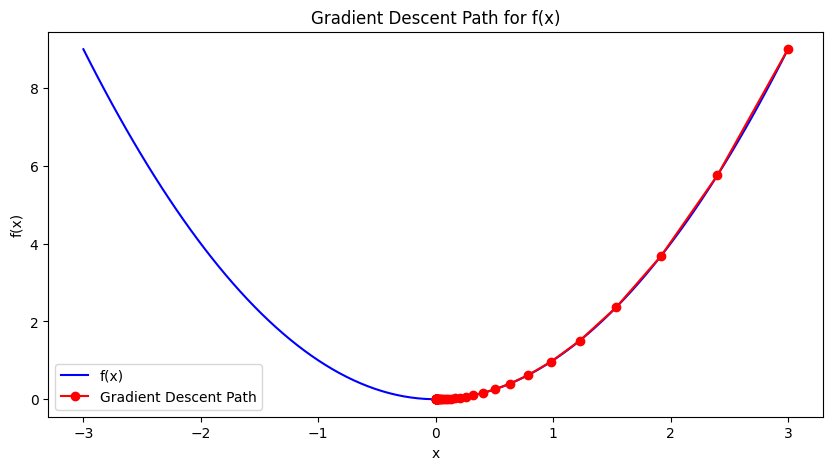

In [105]:
from utilities import plot_gradient_descent
x_start = 3
learning_rate = 0.1
iterations = 50

#f = lambda x: x**4 - 8*x**2 + 3*x + 10
#df = lambda x: 4*x**3 - 16*x + 3

plot_gradient_descent(f, df, x_start, learning_rate, iterations, start=-3, end=3)
    

In [124]:
#### Computation Graphs in Pytorch (Basic)

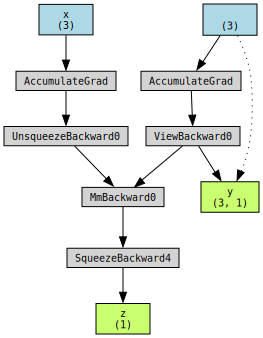

In [448]:
import torch
x = torch.tensor([0.1,0.2,0.3], requires_grad=True)
y = torch.tensor([0.1,0.2,0.3], requires_grad=True).view((3,1))
z = x @ y

from torchviz import make_dot
make_dot((x,y,z), params={'x': x, 'y':y, 'z':z})

In [12]:
import torch

# Define the function y=x^2 and its derivative
x = torch.tensor([0.3], requires_grad=True)
y = x**2

# Define the learning rate and number of epochs
lr = 0.1
epochs = 50

# Perform gradient descent
for i in range(epochs):
    
    # Compute the gradients
    y.backward()

    # Update the parameters
    with torch.no_grad():
        x -= lr * x.grad

        ## Zero out the gradients for the next iteration
        x.grad = None

    # Recompute the function value with the updated parameters
    y = x**2

    # Print the current loss
    print(f"Epoch {i+1}: x={x.detach().numpy()}, y={y.detach().numpy()}")


Epoch 1: x=[0.24000001], y=[0.0576]
Epoch 2: x=[0.192], y=[0.036864]
Epoch 3: x=[0.1536], y=[0.02359296]
Epoch 4: x=[0.12288], y=[0.0150995]
Epoch 5: x=[0.098304], y=[0.00966368]
Epoch 6: x=[0.0786432], y=[0.00618475]
Epoch 7: x=[0.06291457], y=[0.00395824]
Epoch 8: x=[0.05033165], y=[0.00253328]
Epoch 9: x=[0.04026532], y=[0.0016213]
Epoch 10: x=[0.03221226], y=[0.00103763]
Epoch 11: x=[0.02576981], y=[0.00066408]
Epoch 12: x=[0.02061584], y=[0.00042501]
Epoch 13: x=[0.01649268], y=[0.00027201]
Epoch 14: x=[0.01319414], y=[0.00017409]
Epoch 15: x=[0.01055531], y=[0.00011141]
Epoch 16: x=[0.00844425], y=[7.130537e-05]
Epoch 17: x=[0.0067554], y=[4.5635436e-05]
Epoch 18: x=[0.00540432], y=[2.920668e-05]
Epoch 19: x=[0.00432346], y=[1.8692275e-05]
Epoch 20: x=[0.00345877], y=[1.1963056e-05]
Epoch 21: x=[0.00276701], y=[7.656356e-06]
Epoch 22: x=[0.00221361], y=[4.900068e-06]
Epoch 23: x=[0.00177089], y=[3.1360435e-06]
Epoch 24: x=[0.00141671], y=[2.007068e-06]
Epoch 25: x=[0.00113337], y

In [25]:
import torch.nn.functional as F

W = torch.rand((27,27), requires_grad=True)
X = torch.tensor(xs)
Y = torch.tensor(ys)

X = F.one_hot(torch.tensor(xs), num_classes=27).float()
X.requires_grad = True
logits = X @ W
counts = logits.exp() #exp(z
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(len(X)), Y].log().mean()

/var/folders/hr/fqb89fcj36s5zxjlt98289xw0000gn/T/ipykernel_67687/776130399.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(xs)
/var/folders/hr/fqb89fcj36s5zxjlt98289xw0000gn/T/ipykernel_67687/776130399.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(ys)
/var/folders/hr/fqb89fcj36s5zxjlt98289xw0000gn/T/ipykernel_67687/776130399.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = F.one_hot(torch.tensor(xs), num_classes=27).float()


In [26]:
len(X)

228146

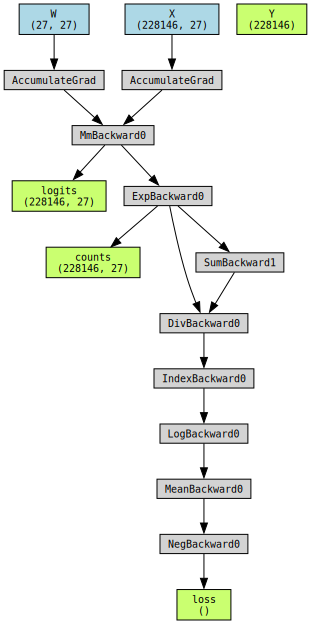

In [27]:
import torchviz 
# Compute gradients

# Visualize the gradients
torchviz.make_dot((W, X, Y, logits, counts, loss), params=dict(W=W, X=X, Y=Y, logits=logits, counts=counts, loss=loss))

In [16]:
import torch
from utilities import read_file #helper function for reading in files.

names = list(read_file('names.txt'))
C = sorted(list(set(''.join(names))))
ctoi = {c:i+1 for i,c in enumerate(C)}
ctoi['.'] = 0
itos = {i:s for s,i in ctoi.items()}


xs = []
ys = []

for n in names:
    n = ['.'] + list(n) +['.']
    for c1, c2 in zip(n, n[1:]): 
        ix1, ix2 = ctoi[c1], ctoi[c2]
        xs.append(ix1)
        ys.append(ix2)

W = torch.rand((27,27), requires_grad=True)
X = torch.tensor(xs)
Y = torch.tensor(ys)

In [17]:
import torch.nn.functional as F

X = F.one_hot(torch.tensor(xs), num_classes=27).float()
X.requires_grad = True
logits = X @ W
counts = logits.exp()w
probs = counts / counts.sum(1, keepdims=True)
loss = -probs[torch.arange(len(X)), Y].log().mean()

In [18]:
print(loss.item())

3.3440961837768555


In [19]:
W.grad = None
loss.backward()

In [20]:
W.data += -0.1 * W.grad 

In [ ]:
## Training Loop

In [23]:

lr = 10

for i in range(100):
    
    X = F.one_hot(torch.tensor(xs), num_classes=27).float()
    X.requires_grad = True
    logits = X @ W
    counts = logits.exp() #exp(z
    probs = counts / counts.sum(1, keepdims=True)
    loss = -probs[torch.arange(len(X)), Y].log().mean()
    
    print(loss.item())
    loss.backward()

    # Update the parameters
    with torch.no_grad():
        W += -lr * W.grad
        W.grad = None
        

2.4689276218414307
2.468898296356201
2.4688689708709717
2.468839645385742
2.4688103199005127
2.4687814712524414
2.468752384185791
2.4687235355377197
2.4686949253082275
2.4686665534973145
2.468637704849243
2.468609571456909
2.468581199645996
2.468553066253662
2.468524932861328
2.468496799468994
2.4684689044952393
2.4684410095214844
2.4684135913848877
2.468385934829712
2.4683585166931152
2.4683313369750977
2.468303918838501
2.4682769775390625
2.468249559402466
2.4682226181030273
2.468195915222168
2.4681689739227295
2.46814227104187
2.46811580657959
2.4680893421173096
2.46806263923645
2.468036651611328
2.468010187149048
2.467984199523926
2.4679579734802246
2.4679322242736816
2.4679064750671387
2.4678807258605957
2.4678549766540527
2.467829465866089
2.467803716659546
2.467778205871582
2.4677534103393555
2.4677278995513916
2.467702627182007
2.4676778316497803
2.4676527976989746
2.467628240585327
2.4676029682159424
2.467578411102295
2.4675538539886475
2.467529535293579
2.4675049781799316
2.4


# NOTES:

- Leave Backprop off the table until a later date, existing network isn't the best example of a classic NN architecture. Only one non-linear activation in output layer. Showing how to perform backprop over a non-standard NN might be a bit confusing.

- Softmax is going to make the math a bit more complex since most pytorch implementations don't explicitly use the softmax but rather the pre-softmax values that are computed at the same time with the cross entropy loss. This distinction is important in pytorch and is something folks are likely to run into when building classifiers.

- Vector notation for partial derivatives can be confusing unless represented explicitly using bmatrix. Also not sure if I should include the idea of the jacobian since it is not explicitly used in the autograd package for computing gradients. At the same time introspection of the jacobian does allow better insights into how changes in the inputs of the models affect the outputs and similarly how the inputs impact the parameters of the model.

### Backpropagation, Chain Rule and the Jacobian [DRAFT]

We want to find the optimal parameters $\mathbf{W}$ for our neural network that minimize the loss function, which measures how well the network is performing. However, the loss function $\mathcal{L}$ is not directly defined in terms of the weight matrix $\mathbf{W}$, so we cannot compute the gradient of the loss function with respect to the weights directly.

$$
\mathcal{L}(\theta) = -\frac{1}{T - 1} \sum_{(c_j, c_i) \in \mathcal{D}} \log \hat{y}_i,
$$


The challenge is to find a way to express the gradient of the loss function with respect to $\mathbf{W}$, so that we can update the weights using gradient-based optimization methods, such as gradient descent.

Let's provide a more mathematical illustration of the chain rule by breaking down the gradient of the loss function with respect to the weights, $\frac{\partial \mathcal{L}}{\partial \mathbf{W}}$, using intermediate variables.


We will use the same neural network architecture as above.
$$
\mathbf{x} = \phi(c_j),
$$

$$
\mathbf{h} = \mathbf{W} \cdot \mathbf{x}
$$

$$
\mathbf{\hat{y}} = \text{softmax}(\mathbf{h}),
$$

To compute the gradient of the loss function with respect to the weights, we need to apply the chain rule through these layers. For example, let's compute the gradient of the loss function with respect to the weight matrix $\mathbf{W}$:

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}} = \sum_{i=1}^{V} \frac{\partial \mathcal{L}}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial \mathbf{h}} \frac{\partial \mathbf{h}}{\partial \mathbf{W}}
$$

Here, the individual gradients are:

1. Gradient of the loss function with respect to the predicted probabilities, $\frac{\partial \mathcal{L}}{\partial \hat{y}_i}$:

$$
\frac{\partial \mathcal{L}}{\partial \hat{y}_i} = -\frac{1}{T - 1} \frac{1}{\hat{y}_i}
$$

2. Gradient of the predicted probabilities with respect to the pre-softmax values, $\frac{\partial \hat{y}_i}{\partial h_k}$:

$$
\frac{\partial \hat{y}_i}{\partial h_k} = \begin{cases}
\hat{y}_i(1-\hat{y}_k) & \text{if } i=k \\
-\hat{y}_i \hat{y}_k & \text{if } i \ne k
\end{cases}
$$

3. Gradient of the pre-softmax values with respect to the weight matrix, $\frac{\partial \mathbf{h}}{\partial \mathbf{W}}$:

$$
\frac{\partial h_k}{\partial \mathbf{W}} = \mathbf{a}
$$

By multiplying these individual gradients together and summing over all possible characters, we can compute the gradient of the loss function with respect to $\mathbf{W}$.